# 3. Etapa de entrenamiento y testeo de un modelo de análisis de sentimiento

Voy a cargar el .csv generado en el notebook anterior 2_Etapa_de_preprocesado_de_texto

In [1]:
import pandas as pd

In [2]:
# Conectar con el almacenamiento de GoogleDrive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# cargar df del notebook anterior
sample_beauty3 = pd.read_csv('/content/drive/MyDrive/preprocessing_data.csv')

# vista del df
sample_beauty3.head(3)

,overall,reviewText,normalization_revs
0,0,The color that comes out of this sunless tanne...,color come sunless tanner incredible familiar ...
1,0,"I love this brand, but this one didn't work as...",love brand one work expecting like perfect hai...
2,0,Smells ok. Not too strong.,smell ok strong


In [4]:
sample_beauty3.shape

(13409, 3)

In [5]:
sample_beauty3['overall'].value_counts(ascending=True)

overall
0    6079
1    7330
Name: count, dtype: int64

In [6]:
sample_beauty3.isna().any()

overall               False
reviewText            False
normalization_revs    False
dtype: bool

In [7]:
sample_beauty3.isnull().sum()

overall               0
reviewText            0
normalization_revs    0
dtype: int64

In [8]:
# Cambiar el nombre de la columna overall por sentiment
sample_beauty3 = sample_beauty3.rename(columns={'overall': 'sentiment'})

In [9]:
# Verificar nombre de las columnas
print(sample_beauty3.columns)

Index(['sentiment', 'reviewText', 'normalization_revs'], dtype='object')


División de train/test

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
# Crear sets de train y test
train, test = train_test_split(sample_beauty3,
                               train_size=0.75,
                               test_size=0.25,
                               stratify=sample_beauty3['sentiment'],
                               random_state=42)

In [12]:
# Guardar los sets creados
train.to_csv('/content/drive/MyDrive/data_train')
test.to_csv('/content/drive/MyDrive/data_test')


In [13]:
# Revisar la forma de los sets
print(train.shape)
print(test.shape)

(10056, 3)
(3353, 3)


In [14]:
print('- Info train -')
train.info()

print('\n - - - - - - - - - - - - - - - - - - - - - - - - - - -  -\n')

print('- Info test -')
test.info()

- Info train -
<class 'pandas.core.frame.DataFrame'>
Index: 10056 entries, 9037 to 6764
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   sentiment           10056 non-null  int64 
 1   reviewText          10056 non-null  object
 2   normalization_revs  10056 non-null  object
dtypes: int64(1), object(2)
memory usage: 314.2+ KB

 - - - - - - - - - - - - - - - - - - - - - - - - - - -  -

- Info test -
<class 'pandas.core.frame.DataFrame'>
Index: 3353 entries, 4836 to 7084
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   sentiment           3353 non-null   int64 
 1   reviewText          3353 non-null   object
 2   normalization_revs  3353 non-null   object
dtypes: int64(1), object(2)
memory usage: 104.8+ KB


### Preparación de datos

In [15]:
# Extraer los textos normzalizados de train y test
norm_train = [text for text in train['normalization_revs']]
norm_test = [text for text in test['normalization_revs']]

In [16]:
# Convertir el texto a lista
data_train = [str(text).split() for text in norm_train]
data_test = [str(text).split() for text in norm_test]
len(data_train), len(data_test)

(10056, 3353)

In [17]:
# Extraer las etiquetas de la columna sentiment de cada uno de los conjuntos
labels_train = [score for score in train['sentiment']]
labels_test = [score for score in test['sentiment']]
len(labels_train), len(labels_test)

(10056, 3353)

In [18]:
# Encontrar la longitud máxima de las palabras en ambos sets
size_train = max(len(word) for word in data_train )
size_test = max(len(word) for word in data_test )
size_train, size_test


(1614, 642)

In [19]:
# Extraer las caracteristicas de BOW de los sets

def extract_bow(data_train, data_test, text_size=2000):

  # Ajustar vectorizer a datos
  vectorizer = CountVectorizer(max_features=text_size,
                               preprocessor=lambda x: x,
                               tokenizer=lambda x: x)

  # Ajustar vectorizer a datos de train y convertirlos a matriz
  features_train = vectorizer.fit_transform(data_train).toarray()

  # Ajustar vectorizer a datos de test y convertirlos a matriz
  features_test = vectorizer.transform(data_test).toarray()

  # Obtener vocbulario
  vocabulary = vectorizer.vocabulary_

  return features_train, features_test, vocabulary


Revisión de carácteristicas generadas

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
import random
import pickle

In [21]:
# Extraer caracteristicas BoW para los sets
features_train, features_test, vocabulary = extract_bow(data_train,
                                                        data_test,
                                                        size_test)
# Cantidad de palabras únicas
print("Unique words: {} words".format(len(vocabulary)))

print('\n - - - - - - - - - - - - - - - - - - - - - - - - - - -  -\n')


# Muestra aleatoria de palabras d
print("\n Sample words: {}".format(random.sample(list(vocabulary.keys()), 10)))
print('\n - - - - - - - - - - - - - - - - - - - - - - - - - - -  -\n')


print('\nPreprocessed words')
print(data_train[5])
print('\n - - - - - - - - - - - - - - - - - - - - - - - - - - -  -\n')

print("\n Sentiment")
print(labels_train[5])
print('\n - - - - - - - - - - - - - - - - - - - - - - - - - - -  -\n')


print('\n Bag of Words')
print(features_train[5])
print('\n - - - - - - - - - - - - - - - - - - - - - - - - - - -  -\n')

# print('\n vocabulary')
# print(len(vocabulary))
# print('\n - - - - - - - - - - - - - - - - - - - - - - - - - - -  -\n')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Unique words: 642 words

 - - - - - - - - - - - - - - - - - - - - - - - - - - -  -


 Sample words: ['add', 'though', 'along', 'two', 'also', 'irritate', 'orange', 'home', 'maybe', 'effect']

 - - - - - - - - - - - - - - - - - - - - - - - - - - -  -


Preprocessed words
['like', 'many', 'gotten', 'contouring', 'highlighting', 'trend', 'date', 'using', 'regular', 'blush', 'brush', 'faced', 'cocoa', 'contour', 'palette', 'economical', 'choice', 'since', 'obviously', 'already', 'owned', 'brush', 'use', 'blush', 'setting', 'powder', 'precise', 'application', 'would', 'like', 'accordingly', 'curious', 'try', 'brush', 'since', 'specifically', 'made', 'purpose', 'really', 'enjoying', 'slightly', 'tapered', 'design', 'perfect', 'depositing', 'highlighter', 'bronzer', 'exactly', 'want', 'happier', 'definition', 'brush', 'helped', 'create', 'face', 'also', 'like', 'feel', 'face', 'seems', 'equally', 'soft', 'sephora', 'pro', 'brush', 'regularly', 'using', 'year', 'even', 'affordable', 'price', '

Guardar y cargar modelo

In [22]:
def save_pkl(model_name, model):
  with open(model_name, 'wb') as files:
    pickle.dump(model, files)

In [23]:
def load_pkl(model_name):
  # load saved model
  with open(model_name , 'rb') as f:
      lr = pickle.load(f)
  return lr


In [24]:
preprocessed_data = dict(data_train=data_train, data_test=data_test,
                              labels_train=labels_train, labels_test=labels_test)
preprocessed_data.keys()

dict_keys(['data_train', 'data_test', 'labels_train', 'labels_test'])

In [25]:
save_pkl('preprocessed_data.pkl', preprocessed_data)


In [26]:
!cp preprocessed_data.pkl /content/drive/MyDrive/preprocessed_data.pkl

In [27]:
# obtenes la data guardada
preprocessed_data = load_pkl('/content/drive/MyDrive/preprocessed_data.pkl')
preprocessed_data.keys()

dict_keys(['data_train', 'data_test', 'labels_train', 'labels_test'])

In [28]:
# Ahora guardamos las features de BoW
bow_features = dict(features_train=features_train, features_test=features_test,
                             vocabulary=vocabulary)
bow_features.keys()

dict_keys(['features_train', 'features_test', 'vocabulary'])

In [29]:
save_pkl('bow_features.pkl', bow_features)

In [30]:
!cp bow_features.pkl /content/drive/MyDrive/bow_features.pkl

In [31]:
# obtenes la data guardada
bow_features = load_pkl('/content/drive/MyDrive/bow_features.pkl')
bow_features.keys()

dict_keys(['features_train', 'features_test', 'vocabulary'])

In [32]:
import tensorflow as tf
# import sklearn.preprocessing as pr
# from tensorflow.keras.utils import pad_sequences
import numpy as np

# Random Forest

Entrenamiento y test

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np
import pickle

In [34]:
# creamos variables standard
X_train = features_train
y_train = labels_train

X_test = features_test
y_test = labels_test

In [71]:
# modelo a entrenar
model1 = RandomForestClassifier()

# Elegimos algunos hiperparámetros para buscar el óptimo
params = {"n_estimators": range(50, 100, 500),
           "min_samples_split": range(2, 5, 10)}


# Entrenamos usando grid_search para encontrar los hiperparámetros óptimos
grid_search = GridSearchCV(model1, params)
grid_search.fit(X_train, y_train)

print("El 'n_estimators' optimo es:", grid_search.best_params_["n_estimators"])
print("El 'min_samples_split' optimo es:", grid_search.best_params_["min_samples_split"])

El 'n_estimators' optimo es: 50
El 'min_samples_split' optimo es: 2


In [72]:
# Configuramos el modelo con los hiperparámetros óptimos
model1 = RandomForestClassifier(n_estimators=grid_search.best_params_["n_estimators"],
                                min_samples_split=grid_search.best_params_["min_samples_split"],
                                )

# Entrenamos el modelo
model1.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

Resultados train

In [73]:
train_predicted = model1.predict(X_train)
accuracy_train = np.mean(train_predicted == y_train)
baseline_accuracy_train = np.mean(0 == y_train)
if(baseline_accuracy_train != 0):
  accuracy_lift_train = 100 * (accuracy_train/baseline_accuracy_train - 1)
else:
  accuracy_lift_train = 0

print("Resultados en train con Random Forest:\n")
print("Baseline accuracy:", round(baseline_accuracy_train, 2))
print("accuracy:", round(accuracy_train, 2))
print("accuracy lift:", round(accuracy_lift_train), "%")

Resultados en train con Random Forest:

Baseline accuracy: 0.0
accuracy: 0.99
accuracy lift: 0 %


Resultados de TEST

In [74]:
test_predicted = model1.predict(X_test)
accuracy_test = np.mean(test_predicted == y_test)
baseline_accuracy_test = np.mean(0 == y_test)
if(baseline_accuracy_train != 0):
  accuracy_lift = 100 * (accuracy_test/baseline_accuracy_test - 1)
else:
  accuracy_lift = 0

print("Resultados en TEST utilizando Random Forest:\n")
print("Baseline accuracy:", round(baseline_accuracy_test, 2))
print("accuracy:", round(accuracy_test, 2))
print("accuracy lift:", round(accuracy_lift), "%")

Resultados en TEST utilizando Random Forest:
-------------------------
Baseline accuracy: 0.0
accuracy: 0.72
accuracy lift: 0 %


Guardar datos de Train

In [75]:
# Guardar modelos
def save_pkl(model_name, model):
    with open(model_name, 'wb') as files:
        pickle.dump(model, files)

In [76]:
# cargar modelos
def load_pkl(model_name):
    with open(model_name, 'rb') as f:
        return pickle.load(f)

In [77]:
# Guardar el modelo
save_pkl('model_random_forest.pkl', model1)

In [78]:
# Copiar a Google Drive
!cp model_random_forest.pkl /content/drive/MyDrive/m1_random_forest.pkl


In [79]:
# Cargar el modelo desde Google Drive
model1 = load_pkl('/content/drive/MyDrive/m1_random_forest.pkl')
print(model1)

RandomForestClassifier(n_estimators=50)


In [80]:
model_features = dict(X_train=X_train,
                      y_train=y_train,
                      X_test=X_test,
                      y_test=y_test)
model_features.keys()


save_pkl('model_features.pkl', model_features)


!cp model_features.pkl /content/drive/MyDrive/model_features.pkl

In [81]:
model_features = load_pkl('/content/drive/MyDrive/model_features.pkl')
model_features.keys()

dict_keys(['X_train', 'y_train', 'X_test', 'y_test'])

### Matriz de confusión

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix,  classification_report

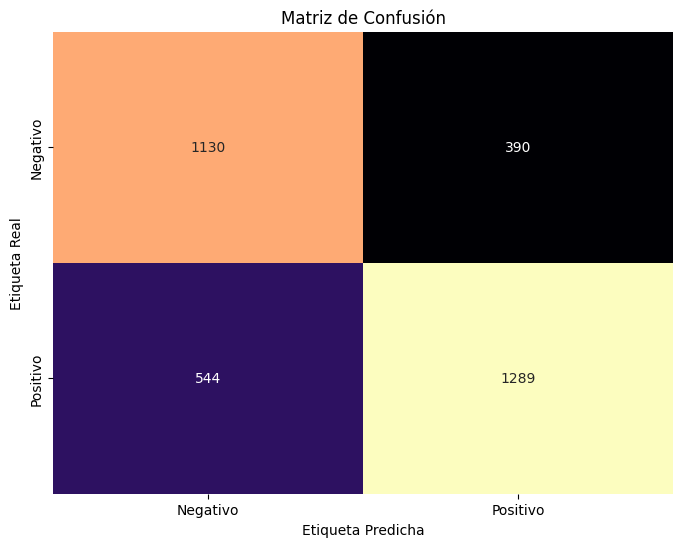

In [83]:
# Generar predicciones binarias
y_pred_bin = (model1.predict(X_test) >= 0.5).astype("int32")

def make_confusion_matrix(train_predicted, test_predicted, figsize=(8, 6)):
    cm = confusion_matrix(train_predicted, test_predicted)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='magma', cbar=False, xticklabels=["Negativo", "Positivo"], yticklabels=["Negativo", "Positivo"])
    plt.xlabel('Etiqueta Predicha')
    plt.ylabel('Etiqueta Real')
    plt.title('Matriz de Confusión')
    plt.show()

    # Mostrar la matriz de confusión
make_confusion_matrix(y_test, y_pred_bin)


In [48]:
print('\nClassification report:\n{}'.format(classification_report(y_test, test_predicted)))


Classification report:
              precision    recall  f1-score   support

           0       0.67      0.72      0.69      1520
           1       0.75      0.71      0.73      1833

    accuracy                           0.71      3353
   macro avg       0.71      0.71      0.71      3353
weighted avg       0.72      0.71      0.72      3353



**True Negatives (N,N) -> 1140**  
Hay 1140 instancias donde el modelo predijo la clase 0 correctamente cuando la clase real también era 0.

**False Positives(N,P)-> 380**  
Hay 380 instancias donde el modelo predijo la clase 1 incorrectamente cuando la clase real era 0.

**False Negatives (P,N)->544**  
Hay 544 instancias donde el modelo predijo la clase 0 incorrectamente cuando la clase real era 1.

**True Positives (P,P) -> 1289**  
Hay 1289 instancias donde el modelo predijo la clase 1 correctamente cuando la clase real también era 1.


*Precision*  
**0.68** >> el 68% de las veces que el modelo predice la clase 0, está en lo correcto.  
**0.77** >> significa que el 77% de las veces que el modelo predice la clase 1, está en lo correcto.

*Recall*  
 **0.75** >> el modelo captura el 75% de todos los verdaderos ejemplos de la clase 0.  
**0.70** >> el modelo captura el 70% de todos los verdaderos ejemplos de la clase 1.

*F1-Score*  
** 0.71 y 0.74 ** balance entre precisión y exhaustividad.

*Support*  

1520 ejemplos reales de la clase 0.  
1833 ejemplos reales de la clase 1.

*Comentarios*  
Todavía se pueden hacer ajuster para mejorar se puede:

*   Ajustar los pesos de las clases o equilibrando los datos.
*   Realizar ajustes en hiperparámetros
*   Aumentar el conjunto de datos de entrenamiento

El modelo está "equilibrado" con oportunidad a mejorar

## Deep Learning

In [46]:
import numpy as np
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from sklearn.preprocessing import LabelEncoder


# Configurar parámetros
max_words = 500
vocabulary_size = 5000
embedding_size = 32

# Preprocesar las secuencias
X_train_lstm = sequence.pad_sequences(X_train, maxlen=max_words)
X_test_lstm = sequence.pad_sequences(X_test, maxlen=max_words)

# Inicializar el modelo secuencial
model = Sequential()
model.add(Embedding(vocabulary_size, embedding_size))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))

# Compilar el modelo
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Convertir las etiquetas de destino a valores numéricos
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Dividir el conjunto de entrenamiento para obtener datos de validación
X_train2, X_valid, y_train2, y_valid = train_test_split(X_train_lstm, y_train_encoded, test_size=0.1, random_state=42)

# Entrenar el modelo
batch_size = 64
num_epochs = 1
model.fit(X_train2, y_train2,
          validation_data=(X_valid, y_valid),
          batch_size=batch_size, epochs=num_epochs)

# Predecir etiquetas para el conjunto de prueba
y_test_prob = model.predict(X_test_lstm)

# Convertir probabilidades a etiquetas binarias
y_test_pred = (y_test_prob >= 0.5).astype(int).flatten()

# Convertir etiquetas reales a formato binario
y_test_encoded = label_encoder.transform(y_test)

print(model.summary())


105/105 [==============================] - 14s 128ms/step
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, None, 32)          160000    
                                                                 
 lstm_5 (LSTM)               (None, 100)               53200     
                                                                 
 dense_5 (Dense)             (None, 1)                 101       
                                                                 
Total params: 213301 (833.21 KB)
Trainable params: 213301 (833.21 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [47]:
# Generar y mostrar el informe de clasificación
print('\nClassification report:\n')
print(classification_report(y_test_encoded, y_test_pred))


Classification report:

              precision    recall  f1-score   support

           0       0.60      0.02      0.03      1520
           1       0.55      0.99      0.71      1833

    accuracy                           0.55      3353
   macro avg       0.57      0.50      0.37      3353
weighted avg       0.57      0.55      0.40      3353



In [38]:
# Guardar el modelo
save_pkl('model_deep_learning.pkl', model)

In [39]:
!cp model_deep_learning.pkl /content/drive/MyDrive/model_deep_learning.pkl

In [40]:
# Cargar el modelo desde Google Drive
model = load_pkl('/content/drive/MyDrive/model_deep_learning.pkl')
print(model)